# Introduction <a name="intro"></a>

In the second notebook we will get acquainted with additional map elements such as
- point symbols, text and legend
- plots with two windows
- orthodrome and rhumb line
- almucantar
- Tissot indicatrix

2. [Map elements](#algus)<br>
    2.1 [Point symbols, text and legend](#ptl)<br>
    2.2 [Plot with two windows](#aknad)<br>
    2.3 [Orthodrome and rhumb line](#orto)<br>
    2.4 [Almucantar](#almukantaraat)<br>
    2.5 [Tissot indicatrix](#ellips)<br>
    2.6 [Task](#ül2)

# 2 Map elements <a name="algus"></a>

## 2.1 Point symbols, text and legend <a name="ptl"></a>

We will now add some additional elements to your plot, such as point symbols, accompanying text, and a legend. We add the map layers of the [feature](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html) module with the command <code>NaturalEarthFeature()</code>. Then we use the <code>plot()</code> command to add the point locations of the Baltic capitals. The first and second parameters of the command are the list of latitudes and latitudes of the cities, respectively. City coordinates must first be converted to the map window projection (<code>transform_point()</code> command). If you add multiple points at once, by default Cartopy will try to connect them with lines. Lines should be hidden to prevent that (<code>linestyle='None'</code>).

We add city names with the <code>text()</code> command and the halo with the command <code>set_path_effects()</code>. You can use the [set_title()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_title.html) command for the title. The [legend ()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html) command adds a legend, and if the <code>label</code> parameter is previously specified for the points, the corresponding legend item is added automatically.

In [1]:
# Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects # needed for adding a halo around the text
import cartopy.crs as ccrs
import cartopy.feature as cfeature

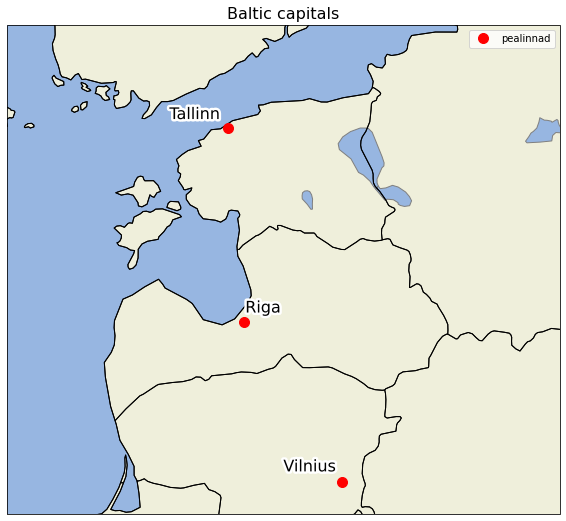

In [2]:
plt.figure(figsize=(12, 9))
proj = ccrs.AlbersEqualArea()
ax = plt.axes(projection=proj)

# Map layers
resolution = '50m'
ax.add_feature(
    cfeature.NaturalEarthFeature('physical', 'ocean', resolution, facecolor=cfeature.COLORS['water'])
)
ax.add_feature(
    cfeature.NaturalEarthFeature('physical', 'land', resolution, edgecolor='black', facecolor=cfeature.COLORS['land'])
)
ax.add_feature(
    cfeature.NaturalEarthFeature('physical', 'lakes', resolution, edgecolor='gray', facecolor=cfeature.COLORS['water'])
)
ax.add_feature(
    cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', resolution, edgecolor='black', facecolor='none')
)

# Coordinates of the cities
tln_lon, tln_lat = 24.745278, 59.437222 # Tallinn
rig_lon, rig_lat = 24.106389, 56.948889 # Riga
vln_lon, vln_lat = 25.283333, 54.683333 # Vilnius

# Coordinate transformation
tln_lon_tp, tln_lat_tp = proj.transform_point(tln_lon, tln_lat, ccrs.Geodetic())
rig_lon_tp, rig_lat_tp = proj.transform_point(rig_lon, rig_lat, ccrs.Geodetic())
vln_lon_tp, vln_lat_tp = proj.transform_point(vln_lon, vln_lat, ccrs.Geodetic())

# Point symbols for the cities
ax.plot(
    [tln_lon_tp, rig_lon_tp, vln_lon_tp], [tln_lat_tp, rig_lat_tp, vln_lat_tp], 
    color='red', marker='o', markersize=10, linestyle='None', label='pealinnad', transform=proj
)

# City names
txt1 = ax.text(tln_lon-1.2, tln_lat+0.3, 'Tallinn', fontsize=16, horizontalalignment='left', transform=ccrs.Geodetic())
txt1.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')]) # halo around text
txt2 = ax.text(rig_lon+0.8, rig_lat, 'Riga', fontsize=16, horizontalalignment='right', transform=ccrs.Geodetic())
txt2.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt3 = ax.text(vln_lon-1.1, vln_lat+0.3, 'Vilnius', fontsize=16, horizontalalignment='left', transform=ccrs.Geodetic())
txt3.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

# Plot title
ax.set_title('Baltic capitals', fontsize=16)

# Extent
extent = (20, 30, 55, 60)
ax.set_extent(extent)

# Legend
plt.legend()

<div style="text-align:right">
    <a href="#intro">beginning</a>
</div>

##  2.2 Plot with two windows <a name="aknad"></a>

Cartopy also allows you to create plots with two (or more) windows. To do this, simply construct two axes for the same figure, on which different projections can then be assigned. Axes can be built using the [subplot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) command of the Matplotlib library. Any additional elements (text, titles, map layers, etc.) can be added separately for each axis.

Text(0.5, 1.0, 'Mollweide projection')

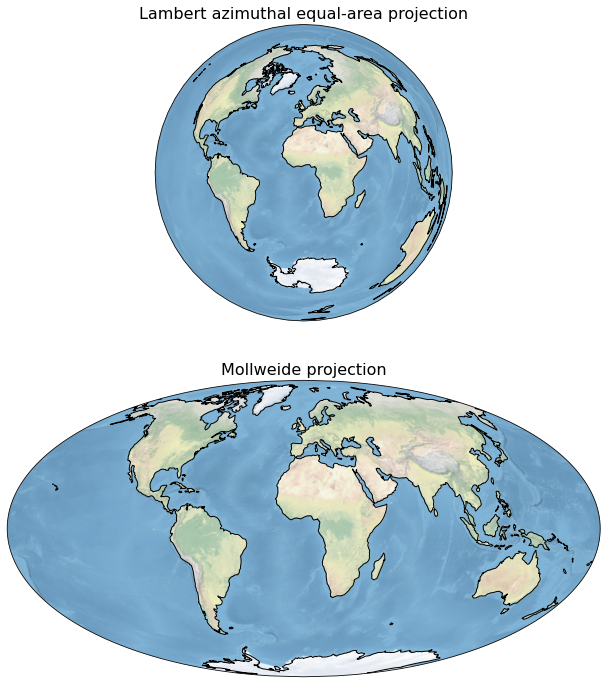

In [3]:
# Projection variables
proj1 = ccrs.LambertAzimuthalEqualArea()
proj2 = ccrs.Mollweide()

plt.figure(figsize=(16, 12))

# First axes
ax1 = plt.subplot(2, 1, 1, projection=proj1)
ax1.stock_img() # madala resolutsiooniga füüsiline maailmakaart
ax1.coastlines()
ax1.set_title('Lambert azimuthal equal-area projection', fontsize=16)

# Second axes
ax2 = plt.subplot(2, 1, 2, projection=proj2)
ax2.stock_img()
ax2.coastlines()
ax2.set_title('Mollweide projection', fontsize=16)

<div style="text-align:right">
    <a href="#intro">beginning</a>
</div>

## 2.3 Orthodrome and rhumb line <a name="orto"></a>

Next, we examine the [orthodrome](https://en.wikipedia.org/wiki/Great-circle_distance) (also the shortest route or geodetic line) and the [rhumb line](https://en.wikipedia.org/wiki/Rhumb_line). Let us take two cities (such as Los Angeles and Madrid) and look at the differences between the orthodrome, rhumb line and the Euclidean straight line. All lines can be added with the standard <code>plot()</code> command, but depending on the line, the projection value of the <code>transform()</code> parameter should be set as
- <code>Geodetic()</code> for the orthodrome
- <code>PlateCarree()</code> for the rhumb line
- in the case of the Euclidean distance line, the projection previously used to create the map window

In addition, the coordinates of the points for the Euclidean distance line must be converted to the projection of the map window with the <code>transform_point()</code> command.

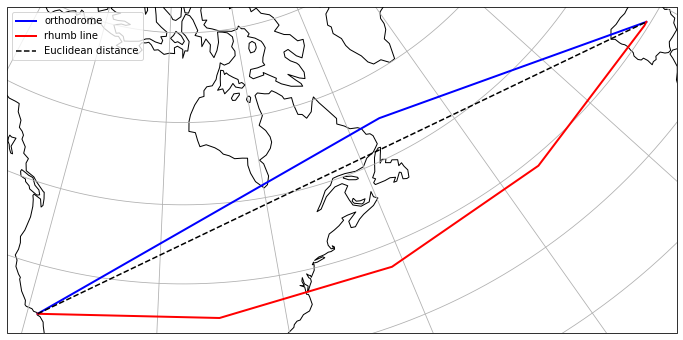

In [4]:
# Coordinates of the cities
la_lon, la_lat = -118.4, 33.9 # Los Angeles
mad_lon, mad_lat = -3.6, 40.5 # Madrid

plt.figure(figsize=(12, 9))
proj = ccrs.LambertConformal()
ax = plt.axes(projection=proj)
ax.coastlines()
ax.gridlines()

# Orthodrome
ax.plot(
    [la_lon, mad_lon], [la_lat, mad_lat], color='blue', linewidth=2, label='orthodrome', transform=ccrs.Geodetic()
)

# Rhumb line
ax.plot(
    [la_lon, mad_lon], [la_lat, mad_lat], color='red', linewidth=2, label='rhumb line', transform=ccrs.PlateCarree()
)

# Coordinate transformation
la_lon_tp1, la_lat_tp1 = proj.transform_point(la_lon, la_lat, ccrs.Geodetic())
mad_lon_tp1, mad_lat_tp1 = proj.transform_point(mad_lon, mad_lat, ccrs.Geodetic())
# Euclidean distance line
ax.plot(
    [la_lon_tp1, mad_lon_tp1], [la_lat_tp1, mad_lat_tp1], color='black', linestyle='--', label='Euclidean distance', transform=proj
)

plt.legend()

It can be seen that depending on the type of line, the trajectories of the lines differ quite a lot. However, the differences in the lines also depend on the projection. For example, in the case of Mercator cylindrical orthogonal projection, the rhumb line coincides with a straight line, i.e. their trajectory is the same.

For the sake of optimization, Cartopy uses a very low resolution to display these lines, which can be seen in the previous plot. For better resolution the value of the corresponding projection resolution parameter must be overwritten. To do this, a new Python class should be created based on the original projection, with this parameter modified as needed.

In [5]:
# LambertAzimuthalEqualArea with better resolution
class HDLambertAzimuthal(ccrs.LambertAzimuthalEqualArea):

    @property
    def threshold(self):
        return super().threshold/100 # 100 korda kõrgem

# Mollweide with better resolution
class HDMollweide(ccrs.Mollweide):

    @property
    def threshold(self):
        return super().threshold/100

Let us now compare the difference in the trajectories of these lines using the example of two different projections. To use the projection classes defined above, they should be applied when creating map window axes. In this case, we use the class <code>HDLambertAzimuthal()</code> for the upper and the class <code>HDMollweide()</code> for the lower window axes. All lines should be defined separately for windows, and it is worth noting that although the projection of a window is determined by a new class, the original projection must be used to convert the coordinates of the straight Euclidean distance line.

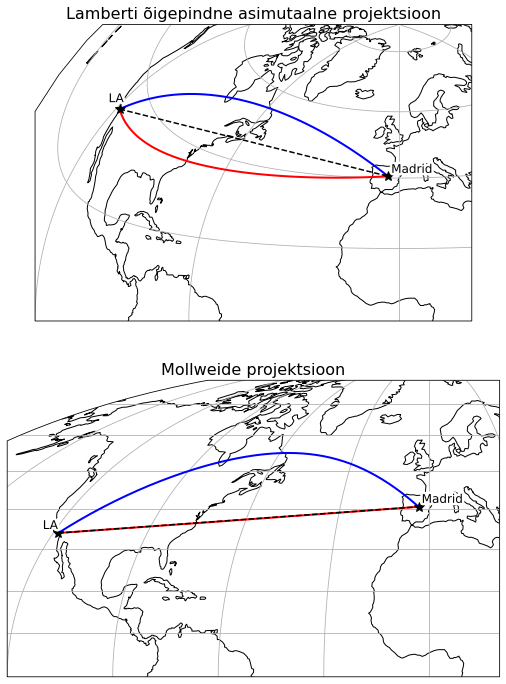

In [6]:
# Projection variables
proj1 = ccrs.LambertAzimuthalEqualArea()
proj2 = ccrs.Mollweide()

# Extent
extent = (-120, 20, 0, 60)

plt.figure(figsize=(16, 12))

# First axes

# Assign the projection class with a better resolution to the axes
ax1 = plt.subplot(2, 1, 1, projection=HDLambertAzimuthal())
ax1.coastlines()
ax1.gridlines()
# Orthodrome
ax1.plot(
    [la_lon, mad_lon], [la_lat, mad_lat], color='blue', linewidth=2, transform=ccrs.Geodetic()
)
# Rhumb line
ax1.plot(
    [la_lon, mad_lon], [la_lat, mad_lat], color='red', linewidth=2, transform=ccrs.PlateCarree()
)
# Coordinate transformation
la_lon_tp1, la_lat_tp1 = proj1.transform_point(la_lon, la_lat, ccrs.Geodetic())
mad_lon_tp1, mad_lat_tp1 = proj1.transform_point(mad_lon, mad_lat, ccrs.Geodetic())
# Euclidean distance line
ax1.plot(
    [la_lon_tp1, mad_lon_tp1], [la_lat_tp1, mad_lat_tp1], color='black', linestyle='--', transform=proj1
)
# Symbols for the cities
ax1.plot(
    [la_lon_tp1, mad_lon_tp1], [la_lat_tp1, mad_lat_tp1], 
    color='black', marker='*', markersize=10, linestyle='None', transform=proj1
)
# City names
txt1 = ax1.text(la_lon-1, la_lat+1, 'LA', fontsize=12, horizontalalignment='right', transform=ccrs.Geodetic())
txt1.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')]) # halo around the text
txt2 = ax1.text(mad_lon+1, mad_lat+1, 'Madrid', fontsize=12, horizontalalignment='left', transform=ccrs.Geodetic())
txt2.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
# Title
ax1.set_title('Lamberti õigepindne asimutaalne projektsioon', fontsize=16)
ax1.set_extent(extent)

# Second axes

# Assign the projection class with a better resolution to the axes
ax2 = plt.subplot(2, 1, 2, projection=HDMollweide())
ax2.coastlines()
ax2.gridlines()
# Orthodrome
ax2.plot(
    [la_lon, mad_lon], [la_lat, mad_lat], color='blue', linewidth=2, transform=ccrs.Geodetic()
)
# Rhumb line
ax2.plot(
    [la_lon, mad_lon], [la_lat, mad_lat], color='red', linewidth=2, transform=ccrs.PlateCarree()
)
# Coordinate transformation
la_lon_tp2, la_lat_tp2 = proj2.transform_point(la_lon, la_lat, ccrs.Geodetic())
mad_lon_tp2, mad_lat_tp2 = proj2.transform_point(mad_lon, mad_lat, ccrs.Geodetic())
# Euclidean distance line
ax2.plot(
    [la_lon_tp2, mad_lon_tp2], [la_lat_tp2, mad_lat_tp2], color='black', linestyle='--', transform=proj2
)
# Symbols for the cities
ax2.plot(
    [la_lon_tp2, mad_lon_tp2], [la_lat_tp2, mad_lat_tp2], 
    color='black', marker='*', markersize=10, linestyle='None', transform=proj2
)
# City names
txt1 = ax2.text(la_lon-1, la_lat+1, 'LA', fontsize=12, horizontalalignment='right', transform=ccrs.Geodetic())
txt1.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')]) # halo around the text
txt2 = ax2.text(mad_lon+1, mad_lat+1, 'Madrid', fontsize=12, horizontalalignment='left', transform=ccrs.Geodetic())
txt2.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
# Title
ax2.set_title('Mollweide projektsioon', fontsize=16)
ax2.set_extent(extent)

<div style="text-align:right">
    <a href="#intro">beginning</a>
</div>

## 2.4 Almucantar <a name="almukantaraat"></a>

The [almucantar](https://en.wikipedia.org/wiki/Almucantar), or contiguous line, is an imaginary circle parallel to the horizon on the celestial body or the surface of the Earth. The Cartopy library does not have a function for constructing an almucantar. However, it is possible to add a circle around a point and in a certain projection to the map. Thus, you can create a function for the almucantar, which calculates the corresponding radius in the correct projection based on the coordinates, projection data, and radius of the center point.

In [7]:
def get_radius(lon, lat, proj, radius):
    # If the latitude is in the southern hemisphere the radius has to be added and it must be subtracted when the latitude is in the northern hemisphere
    if lat <= 0:
        phi = lat+radius
    else:
        phi = lat-radius
    # Coordinate transformation and returning the new latitude
    lon_tp, lat_tp = proj.transform_point(lon, phi, ccrs.PlateCarree())
    return abs(lat_tp)

Now we can apply the created function to add a contour line. In this case, we create a circle with a radius of 45 degrees around Tartu and, using the same function, a buffer with a slightly larger diameter, which determines the extent of our map. Some projections of hemispherical maps are often used to represent the almucantar. The orthographic projection, for example, is well suited for this. You can use the <code>Circle()</code> command in the [patches](https://matplotlib.org/api/_as_gen/matplotlib.patches.Patch.html) module to add a circle with the correct center and radius. The <code>zorder</code> parameter determines the order in which the element is displayed, while a large enough value should be used to ensure that this circle is on top of other layers.

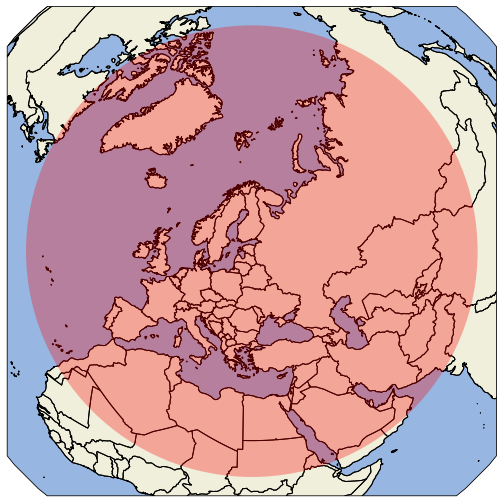

In [8]:
import matplotlib.patches as mpatches # needed for adding the circle

# Tartu coordinates
trt_lon, trt_lat = 26.716667, 58.383333
# Radius
r = 45
# Projection
proj = ccrs.Orthographic(central_longitude=trt_lon, central_latitude=trt_lat)

# Radius and buffer calculation
r_ortho = get_radius(trt_lon, trt_lat, proj, r)
r_buff = get_radius(trt_lon, trt_lat, proj, r+5)

plt.figure(figsize=(12, 9))
ax = plt.axes(projection=proj)

# Since set_extent() does not work with this projection we have to define the extent like this
ax.set_xlim([-r_buff, r_buff])
ax.set_ylim([-r_buff, r_buff])

resolution = '50m'
ax.add_feature(cfeature.OCEAN)
ax.add_feature(
    cfeature.NaturalEarthFeature('physical', 'land', resolution, edgecolor='black', facecolor=cfeature.COLORS['land'])
)
ax.add_feature(
    cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', resolution, edgecolor='black', facecolor='none')
)

# Adding the circle with the calculated radius
ax.add_patch(
    mpatches.Circle(xy=[trt_lon, trt_lat], radius=r_ortho, alpha=0.3, transform=proj, zorder=30, facecolor='red')
)

<div style="text-align:right">
    <a href="#intro">beginning</a>
</div>

## 2.5 Tissot indicatrix <a name="ellips"></a>

The last element is the [Tissot indicatrix](https://en.wikipedia.org/wiki/Tissot%27s_indicatrix), which can be added to the [tissot()](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html?#cartopy.mpl.geoaxes.GeoAxes.tissot) command. If the parameters of the command are not specified, the ellipses of distortion are displayed in the correct projection, but their location does not generally overlap properly with the map grid. In addition, ellipses may be too small for a world map.

C:\Users\Holger\miniconda3\envs\mcarto2021\lib\site-packages\cartopy\mpl\geoaxes.py:762: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x000001AD2F75FC48> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


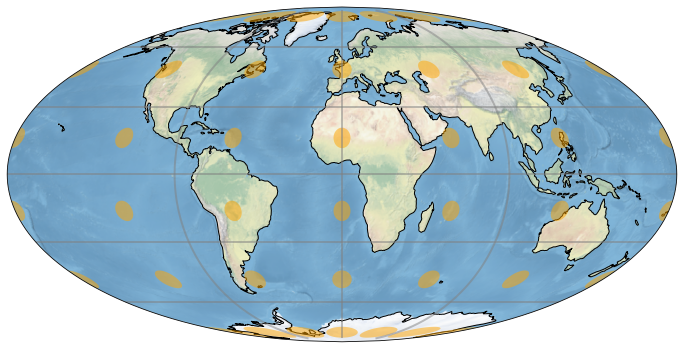

In [9]:
plt.figure(figsize=(12, 9))
proj = ccrs.Mollweide()
ax = plt.axes(projection=proj)
ax.stock_img()
ax.coastlines()

# Meridians at longitudes [-180, -90, 0, 90, 180]
xlocs = [-180, -90, 0, 90, 180]

# Parallels between -90 and 90 with a 30 degree interval
ylocs = []
i = -90
while i <= 90:
    ylocs.append(i)
    i += 30

# Map grid
gl = ax.gridlines(xlocs=xlocs, ylocs=ylocs, linewidth=2, color='gray', alpha=0.5)

# Ellipses
ax.tissot(facecolor='orange', alpha=0.5)

If we want to place the ellipses where the meridians and parallels intersect, we need to locate them using the values used to create the map grid. The size of the ellipses can be adjusted using the <code>rad_km</code> parameter. Of course, you can also change the appearance of the ellipse (color, transparency, etc.).

C:\Users\Holger\miniconda3\envs\mcarto2021\lib\site-packages\cartopy\mpl\geoaxes.py:762: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x000001AD2F8CBDC8> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


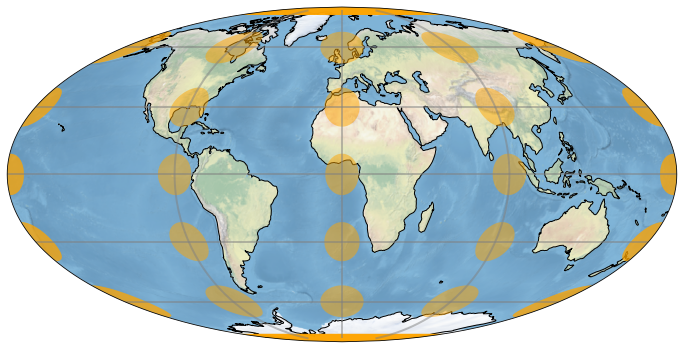

In [10]:
plt.figure(figsize=(12, 9))
proj = ccrs.Mollweide()
ax = plt.axes(projection=proj)
ax.stock_img()
ax.coastlines()

xlocs = [-180, -90, 0, 90, 180]

ylocs = []
i = -90
while i <= 90:
    ylocs.append(i)
    i += 30

gl = ax.gridlines(xlocs=xlocs, ylocs=ylocs, linewidth=2, color='gray', alpha=0.5)

# Ellipses with a radius of 1000 km
ax.tissot(rad_km=1000, lons=xlocs, lats=ylocs, facecolor='orange', alpha=0.5)

<div style="text-align:right">
    <a href="#intro">beginning</a>
</div>

## 2.6 Task <a name="ül2"></a>

Create two plots based on this guide.

The first could be a world map that meets the following requirements:
- is in a projection not yet covered in this notebook
- it is accompanied by a map grid
- at least two additional layers (e.g. coastline and physical map) have been added to the map
- the figure also shows the ellipses of distortion

In [11]:
# Code for the first plot

The second figure has two map windows and meets the following requirements:
- windows have different projections
- two cities are marked with point symbols
- in both cases there is an orthodrome, a rhumb line and a Euclidean distance line between the cities

In [12]:
# Code for the second plot

<div style="text-align:right">
    <a href="#intro">beginning</a>
</div>